In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

df = pd.read_csv('train.csv')
df

<ipython-input-27-cdfc4fe24034>:21: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,131,132,133,135,136,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,171,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,223,224,227,239,240,241,242,243,244,245,246,459,460,461,467,468,469,515,516,523,524,531,532,539,540,547,548,555,556,563,564,565,567,571,572,573,575,579,580,581,582,583,587,588,595,596,603,604,611,612,613,615,795,796,797,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1051,1052,1055,1056,1057,1058,1059,1060,1063,1064,1065,1067,1068,1069,1072,1073,1074,1075,1076,1077,1078,1172,1173,1174,1176,1177,1178,1179,1180,1181,1182,1275,1276,1277,1278,1279,1280,1281,1282,1447,1448,1449,1450,1451,1452,1453,1454,1649,1650

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2022-07-01,1241,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276902
14452,2022-09-01,1969,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260516
14453,2022-02-01,7116,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005
14454,2021-08-01,7117,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


In [ ]:
# Выводим информацию о данных
df.info()
print("Размер данных:", df.shape)  # Выводим размер данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB
Размер данных: (14456, 2666)


In [ ]:
# Удаляем дубликаты строк
df.drop_duplicates(inplace=True)

# Удаляем столбцы с постоянными значениями
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
df.drop(columns=constant_columns, inplace=True)

# Удаляем дублирующиеся столбцы
df = df.T.drop_duplicates().T

print("Размер данных после удаления дубликатов и постоянных столбцов:", df.shape)

Размер данных после удаления дубликатов и постоянных столбцов: (14456, 2194)


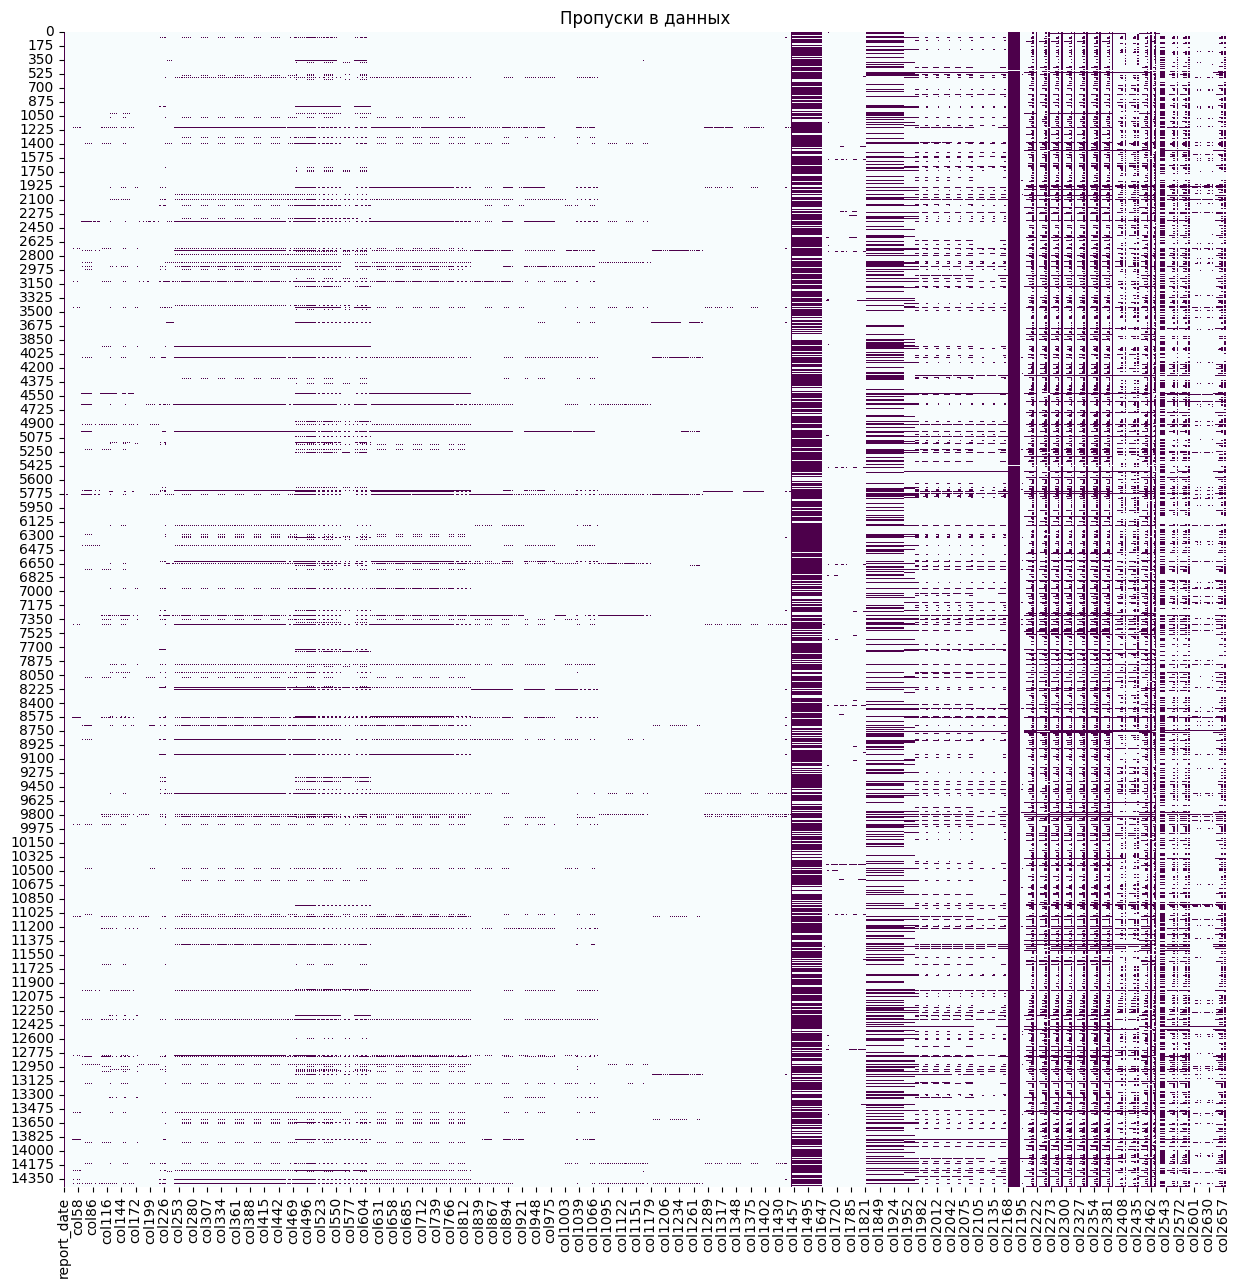

Размер данных после удаления пропусков: (8857, 309)


In [ ]:
# Визуализация пропусков
plt.figure(figsize=(15, 15))  # Устанавливаем размер графика
sns.heatmap(df.isnull(), cmap='BuPu_r', cbar=False)  # Визуализируем пропуски
plt.title('Пропуски в данных')
plt.show()

# Удаляем столбцы с большим количеством пропусков
threshold = 0.8  # 80% пропусков
df = df.loc[:, df.isnull().mean() < threshold]

# Удаляем строки с большим количеством пропусков
threshold = 0.5  # 50% пропусков
df = df.dropna(thresh=df.shape[1] * threshold, axis=0)

print("Размер данных после удаления пропусков:", df.shape)

In [ ]:
# Удаляем столбцы, где есть хотя бы одна ссылка
df = df.drop(columns=[col for col in df.columns if df[col].astype(str).str.contains(r'http[s]?://', na=False).any()])

print("Размер данных после удаления столбцов с URL-адресами:", df.shape)

Размер данных после удаления столбцов с URL-адресами: (8857, 309)


In [ ]:
# Замена нечисловых значений на NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Удаляем столбцы с всеми NaN
df = df.dropna(axis=1, how='all')

print("Размер данных после обработки нечисловых значений:", df.shape)

Размер данных после обработки нечисловых значений: (8857, 307)


Выбросы в датасете:
Колонка 'target': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

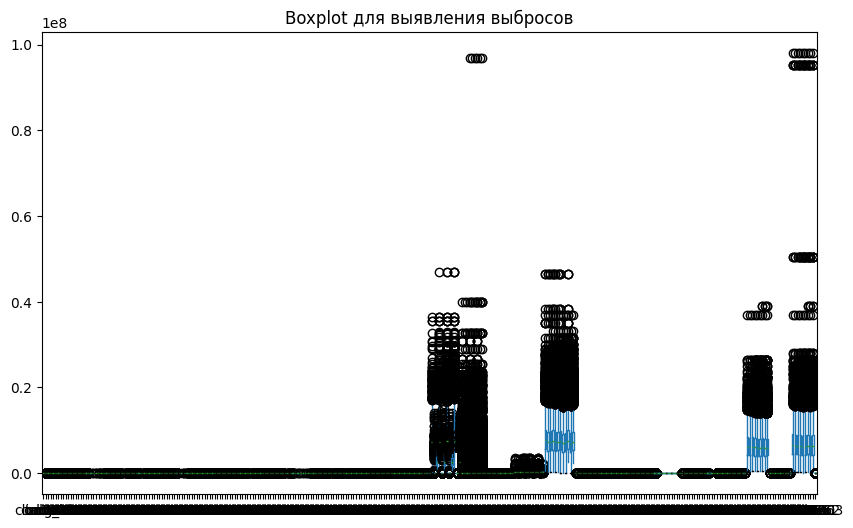

In [ ]:
# Функция для выявления выбросов
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# Применение функции к каждой колонке
outliers_dict = {}
for col in df.columns:
    outliers = detect_outliers_iqr(df[col])
    if not outliers.empty:
        outliers_dict[col] = outliers

# Вывод выбросов
print("Выбросы в датасете:")
for col, outliers in outliers_dict.items():
    print(f"Колонка '{col}': {outliers.tolist()}")

# Визуализация выбросов с использованием boxplot
plt.figure(figsize=(10, 6))
df.boxplot(grid=False)
plt.title('Boxplot для выявления выбросов')
plt.show()

In [ ]:
# Заполнение пропусков медианой или средним значением
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        data = df[col].dropna()
        if len(data) >= 3:
            stat, p = stats.shapiro(data)
            alpha = 0.05
            if p > alpha:
                fill_value = data.mean()
            else:
                fill_value = data.median()
        else:
            fill_value = data.median()
        df[col].fillna(fill_value, inplace=True)

# Проверка пропусков
if df.isnull().any().any():
    print("В данных остались пропуски. Проверьте логику заполнения.")
else:
    print("Пропуски обработаны.")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7509.
  res = hypotest_fun_out(*samples, **kwds)
<ipython-input-34-b748f0bcb453>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(fill_value, inplace=True)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5072.
  

Пропуски обработаны.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6106.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6744.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5924.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6543.
  res = hypotest_fun_out(*samples, **kwds)


Пропусков нет ни в одном столбце.


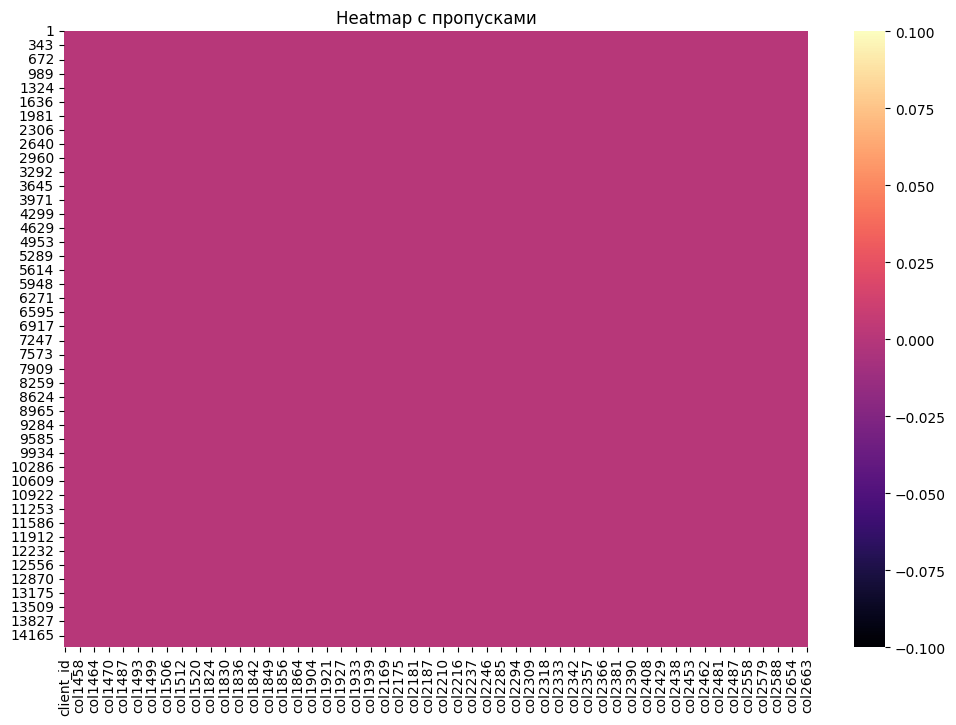

In [ ]:
# Проверка пропусков
null_columns = df.columns[df.isnull().any()].tolist()
if null_columns:
    print(f"Столбцы с пропусками: {null_columns}")
else:
    print("Пропусков нет ни в одном столбце.")

# Визуализация пропусков
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='magma')
plt.title('Heatmap с пропусками')
plt.show()

In [ ]:
# Балансировка классов
class_1 = df[df['target'] == 1]  # Все строки с target = 1
class_0 = df[df['target'] == 0]  # Все строки с target = 0

# Выбор случайных строк из класса 0
class_0_sampled = class_0.sample(n=len(class_1), random_state=42)

# Объединение классов 1 и выбранных строк класса 0
balanced_data = pd.concat([class_1, class_0_sampled])

# Перемешивание данных, чтобы строки не шли подряд
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

print("Размер сбалансированных данных:", balanced_data.shape)

Размер сбалансированных данных: (644, 307)


In [ ]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = balanced_data.drop('target', axis=1)  # Признаки
y = balanced_data['target']  # Целевая переменная

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (450, 306)
Размер тестовой выборки: (194, 306)


ROC-AUC для Random Forest: 0.9313


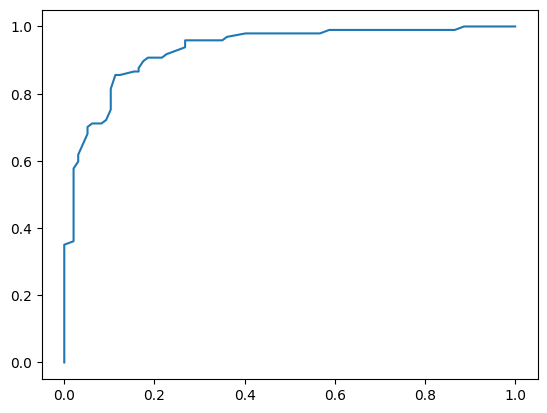

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Обучение модели Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Предсказание вероятностей
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Вычисление ROC-AUC
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"ROC-AUC для Random Forest: {roc_auc_rf:.4f}")

# Построение ROC-кривой
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

ROC-AUC для Decision Tree: 0.7320


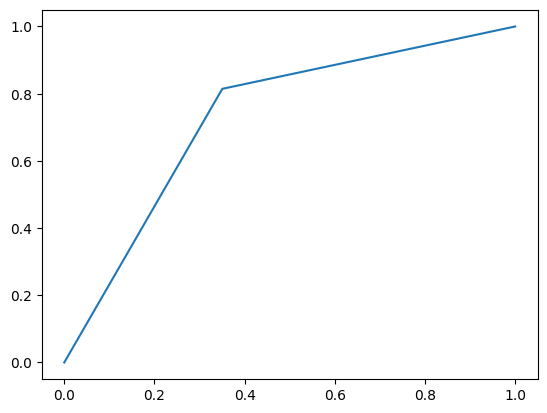

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Обучение модели Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Предсказание вероятностей
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Вычисление ROC-AUC
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
print(f"ROC-AUC для Decision Tree: {roc_auc_dt:.4f}")

# Построение ROC-кривой
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_dt)
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

ROC-AUC для Gradient Boosting: 0.8969


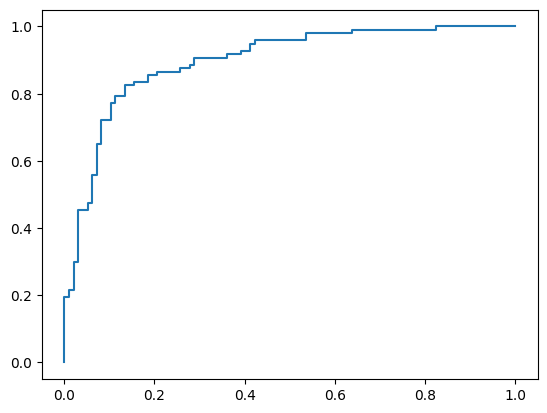

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Обучение модели Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Предсказание вероятностей
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

# Вычисление ROC-AUC
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)
print(f"ROC-AUC для Gradient Boosting: {roc_auc_gb:.4f}")

# Построение ROC-кривой
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_gb)
plt.plot(fpr, tpr, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')

ROC-AUC для Logistic Regression: 0.7537


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


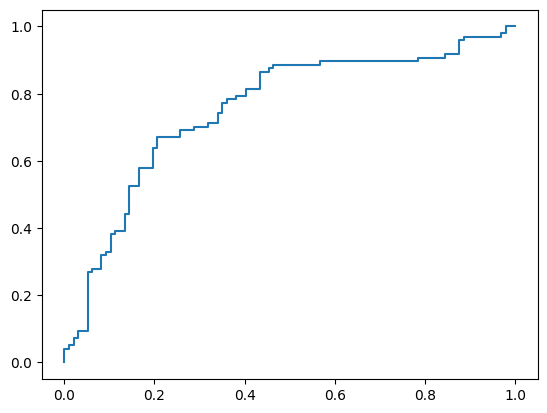

In [ ]:
from sklearn.linear_model import LogisticRegression

# Обучение модели Logistic Regression
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train, y_train)

# Предсказание вероятностей
y_pred_proba_logreg = logreg_model.predict_proba(X_test)[:, 1]

# Вычисление ROC-AUC
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)
print(f"ROC-AUC для Logistic Regression: {roc_auc_logreg:.4f}")

# Построение ROC-кривой
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_logreg)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')

ROC-AUC для KNN: 0.8078


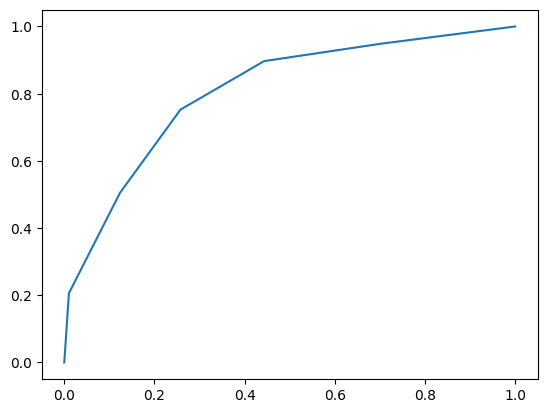

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Обучение модели KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Предсказание вероятностей
y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1]

# Вычисление ROC-AUC
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)
print(f"ROC-AUC для KNN: {roc_auc_knn:.4f}")

# Построение ROC-кривой
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_knn)
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc_knn:.2f})')

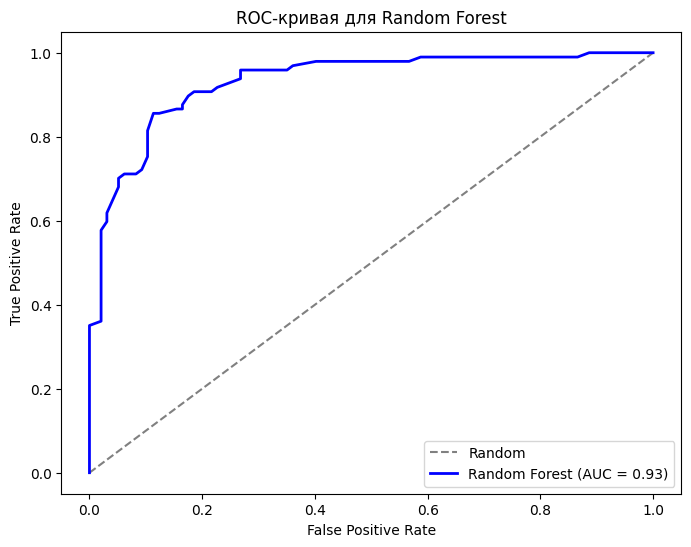

In [ ]:
from sklearn.metrics import roc_curve, auc

# Вычисление ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
roc_auc = auc(fpr, tpr)  # Площадь под ROC-кривой

# Визуализация ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')  # Случайная линия
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для Random Forest')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Вывод метрик для Random Forest
y_pred_rf = rf_model.predict(X_test)

print("Accuracy для Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Classification Report для Random Forest:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix для Random Forest:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy для Random Forest: 0.8505154639175257
Classification Report для Random Forest:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84        97
           1       0.81      0.91      0.86        97

    accuracy                           0.85       194
   macro avg       0.86      0.85      0.85       194
weighted avg       0.86      0.85      0.85       194

Confusion Matrix для Random Forest:
 [[77 20]
 [ 9 88]]


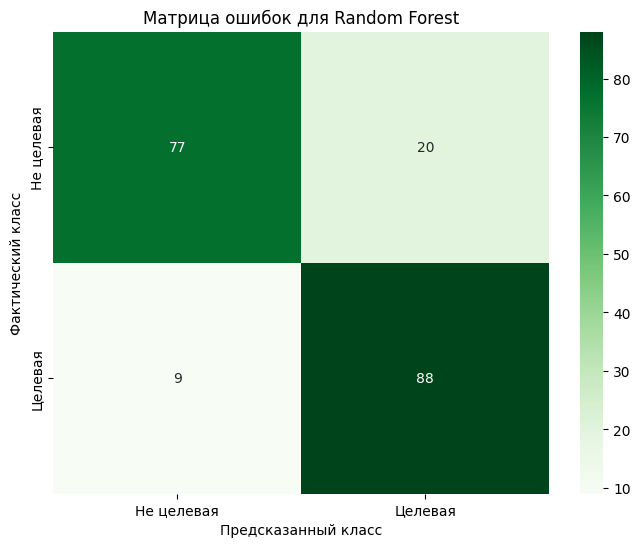

In [ ]:
# Визуализация матрицы ошибок для Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Не целевая', 'Целевая'], yticklabels=['Не целевая', 'Целевая'])
plt.ylabel('Фактический класс')
plt.xlabel('Предсказанный класс')
plt.title('Матрица ошибок для Random Forest')
plt.show()

In [ ]:
df_valid = pd.read_csv('valid.csv')
df_valid

<ipython-input-46-c0b29cf7178c>:1: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,87,88,89,91,95,96,97,99,131,132,133,135,136,140,141,142,144,145,146,147,148,151,152,155,156,157,158,159,160,161,163,164,165,167,168,169,172,173,174,175,176,177,178,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,203,204,207,208,211,212,213,215,216,239,240,241,243,244,245,459,467,563,567,571,575,579,580,583,611,612,795,799,1031,1032,1033,1034,1035,1036,1037,1039,1040,1047,1055,1063,1064,1071,1072,1073,1074,1175,1176,1177,1178,1179,1180,1181,1182,1277,1278,1281,1282,1447,1448,1449,1450,1451,1452,1453,1454,1653,1654,1656,2193,2194,2195,2196,2199) have mixed types. Specify dtype option on import or set low_memory=False.
  df_valid = pd.read_csv('valid.csv')


,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2023-04-01,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4941670.0,4941670.0,4941670.0,NaN,NaN,NaN,4941670.0,4941670.0,4941670.0,0.256919
1,2023-05-01,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11789500.0,11789500.0,11789500.0,NaN,NaN,NaN,11789500.0,11789500.0,11789500.0,0.267221
2,2023-05-01,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7000000.0,7000000.0,7000000.0,NaN,NaN,NaN,7000000.0,7000000.0,7000000.0,0.257217
3,2023-03-01,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
4,2023-03-01,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10391000.0,10391000.0,10391000.0,0.257348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,2023-04-01,4366,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3500000.0,3500000.0,3500000.0,0.256261
3638,2023-04-01,8298,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3639,2023-03-01,835,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256919
3640,2023-03-01,8300,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.257217


In [ ]:
# Удаление постоянных столбцов
constant_columns = [col for col in df_valid.columns if df_valid[col].nunique() == 1]
df_valid.drop(columns=constant_columns, inplace=True)

# Удаление дублирующихся столбцов
df_valid = df_valid.T.drop_duplicates().T
print("Размер данных после удаления постоянных и дублирующихся столбцов:", df_valid.shape)

Размер данных после удаления постоянных и дублирующихся столбцов: (3642, 2071)


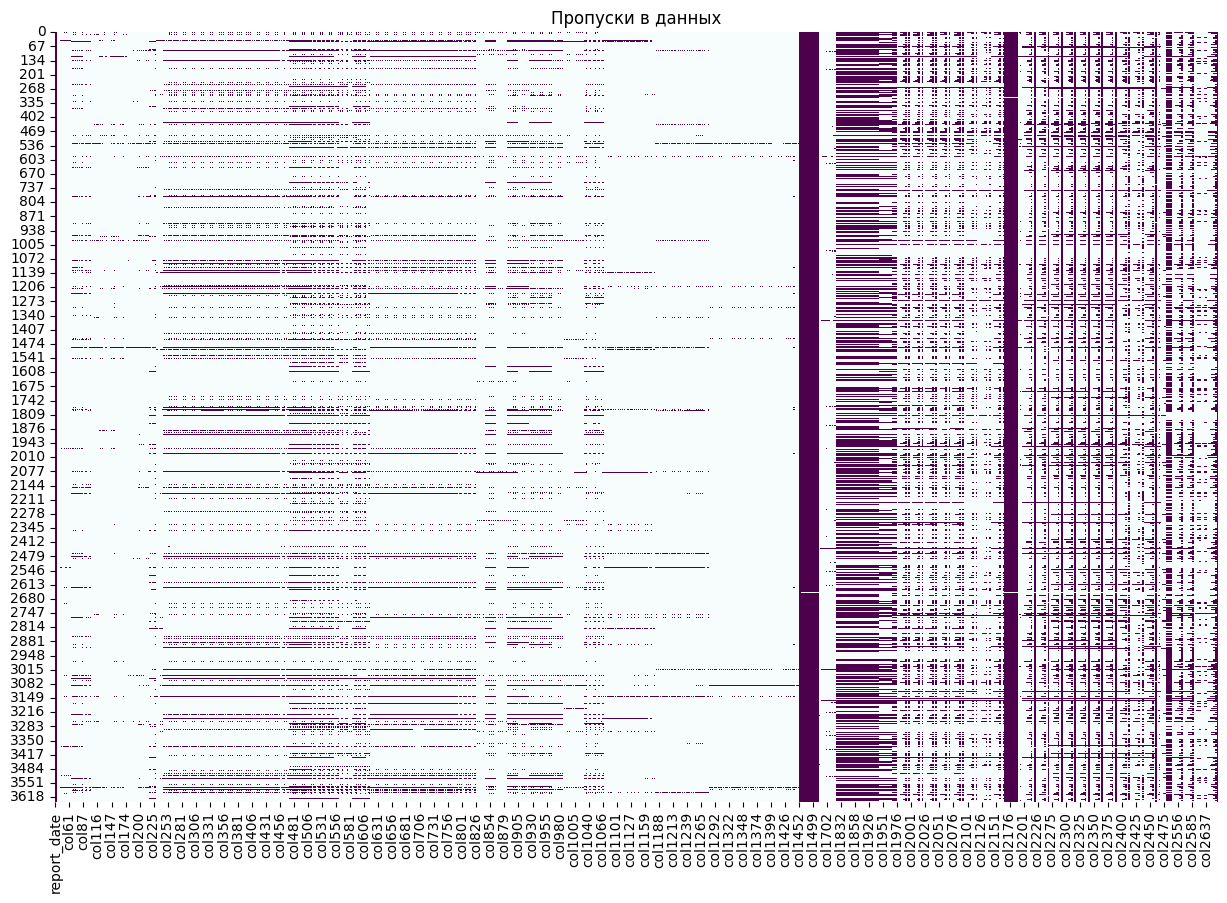

Размер данных после удаления пропусков: (1937, 348)


In [ ]:
# Визуализация пропусков
plt.figure(figsize=(15, 10))
sns.heatmap(df_valid.isnull(), cmap='BuPu_r', cbar=False)
plt.title('Пропуски в данных')
plt.show()

# Удаление столбцов с большим количеством пропусков
threshold = 0.8  # 80% пропусков
df_valid = df_valid.loc[:, df_valid.isnull().mean() < threshold]

# Удаление строк с большим количеством пропусков
threshold = 0.5  # 50% пропусков
df_valid = df_valid.dropna(thresh=df_valid.shape[1] * threshold, axis=0)

print("Размер данных после удаления пропусков:", df_valid.shape)

In [ ]:
# Замена нечисловых значений на NaN
df_valid = df_valid.apply(pd.to_numeric, errors='coerce')

# Удаление столбцов с URL-адресами
df_valid = df_valid.drop(columns=[col for col in df_valid.columns if df_valid[col].astype(str).str.contains(r'http[s]?://', na=False).any()])

print("Размер данных после обработки нечисловых значений:", df_valid.shape)

Размер данных после обработки нечисловых значений: (1937, 348)


Выбросы в датасете:
Колонка 'target': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Колонка 'col476': [22.2908, 67.5869, 45.0355, 41.3171, 46.9484, 44.6089, 46.3454, 48.8323, 48.4817, 48.4817, 40.1817, 43.1068, 40.7387, 48.8582, 48.4817, 43.5994, 48.4817, 43.1068, 48.4817, 67.5869, 69.3572, 45.0355, 44.0562, 45.1412, 69.3444, 48.4817, 47.2361, 69.0683, 67.5869, 39.6588]
Колонка 'col480': [40.793, -8.6507, 45.4722, 45.0355, 25.2633, 43.309, 43.6426, 45.0424, 43.2638, 43.1068, 41.3171, 1.2929, 43.2638, 43.5994, -6.1728, 45.4722, 45.0355, 44.6089, 46.3454, 45.0355, 1.3673, 40.1817, 44.6089, 45.0355, 28.1782, 40.1817, 44.6089, 43.1068, 45.0355, 45.0424, 43.2638, 35.6164, 40.7387, 43.5994, 43.2537, 45.0424, 41.0214, 45.0424, 43.1068, 45.4994, 43.2638, 45.0355, 45.0355, 37.751, 25.2633, -6.8227, 25.2633, -6.1728, 45.0355, 44.0562, 43.1068, 45.0355, 45.0355, 43.5994, 17.0481, 32.7797, 69.3444, 41.6

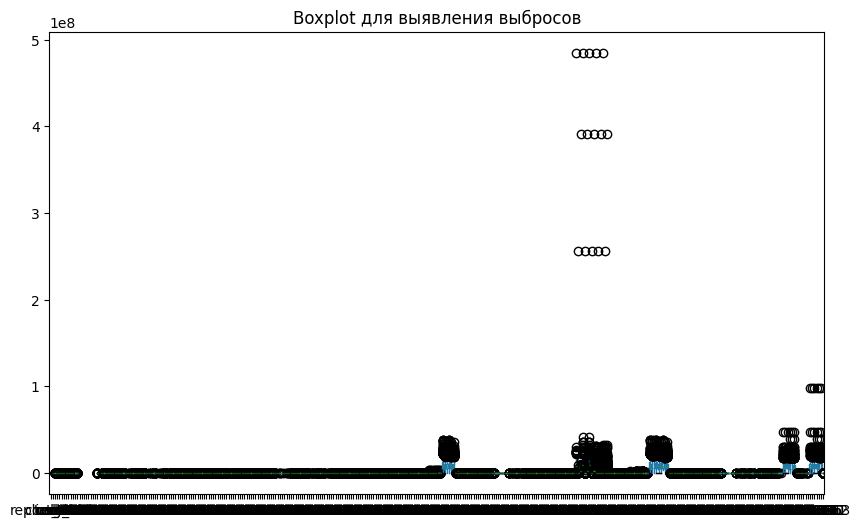

In [ ]:
# Функция для выявления выбросов
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# Применение функции к каждой колонке
outliers_dict = {}
for col in df_valid.columns:
    outliers = detect_outliers_iqr(df_valid[col])
    if not outliers.empty:
        outliers_dict[col] = outliers

# Вывод выбросов
print("Выбросы в датасете:")
for col, outliers in outliers_dict.items():
    print(f"Колонка '{col}': {outliers.tolist()}")

# Визуализация выбросов с использованием boxplot
plt.figure(figsize=(10, 6))
df_valid.boxplot(grid=False)
plt.title('Boxplot для выявления выбросов')
plt.show()

Пропусков нет ни в одном столбце.


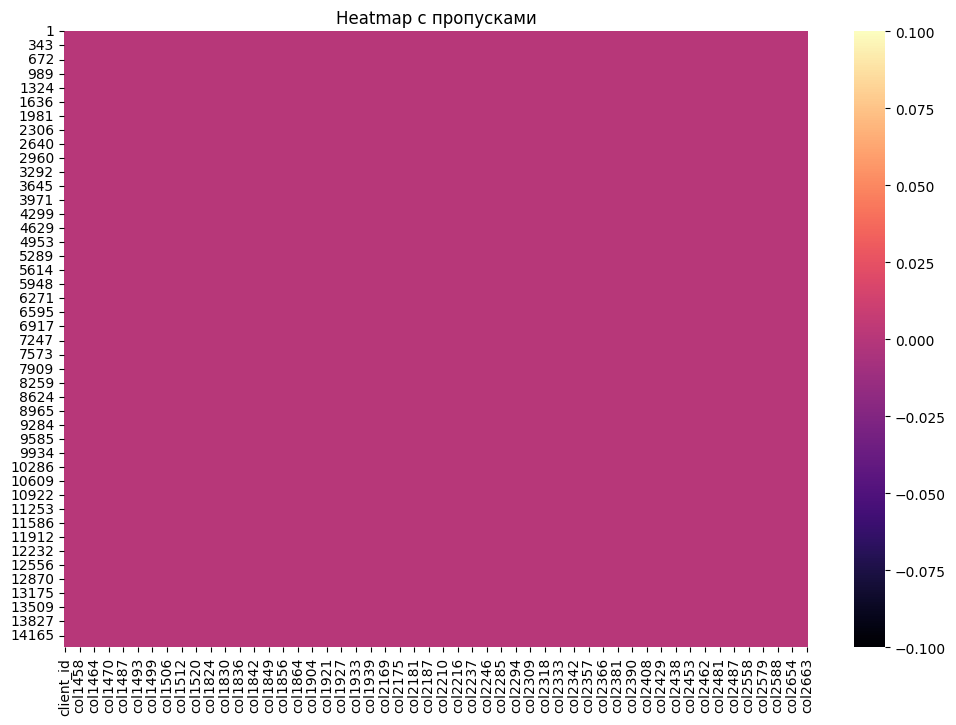

In [ ]:
# Проверка пропусков
null_columns = df.columns[df.isnull().any()].tolist()
if null_columns:
    print(f"Столбцы с пропусками: {null_columns}")
else:
    print("Пропусков нет ни в одном столбце.")

# Визуализация пропусков
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='magma')
plt.title('Heatmap с пропусками')
plt.show()

In [ ]:
# Балансировка классов
class_1 = df_valid[df_valid['target'] == 1]
class_0 = df_valid[df_valid['target'] == 0]
class_0_sampled = class_0.sample(n=len(class_1), random_state=42)
balanced_data_valid = pd.concat([class_1, class_0_sampled])
balanced_data_valid = balanced_data_valid.sample(frac=1, random_state=42).reset_index(drop=True)

print("Размер сбалансированных данных:", balanced_data_valid.shape)

Размер сбалансированных данных: (94, 348)


In [ ]:
# Разделение данных на признаки (X) и целевую переменную (y)
X_valid = balanced_data_valid.drop('target', axis=1)
y_valid = balanced_data_valid['target']

print("Размер данных для валидации:", X_valid.shape)

Размер данных для валидации: (94, 347)


In [ ]:
# Список признаков, использованных при обучении модели
trained_features = rf_model.feature_names_in_
print("Признаки, использованные при обучении модели:", trained_features)

# Список признаков в данных valid.csv
valid_features = X_valid.columns.tolist()
print("Признаки в данных valid.csv:", valid_features)

# Признаки, которые отсутствуют в данных valid.csv
missing_features = set(trained_features) - set(valid_features)
print("Признаки, отсутствующие в данных valid.csv:", missing_features)

# Признаки, которые есть в данных valid.csv, но отсутствуют в обученной модели
extra_features = set(valid_features) - set(trained_features)
print("Признаки, отсутствующие в обученной модели:", extra_features)

# Удаление лишних признаков
X_valid = X_valid.drop(columns=extra_features, errors='ignore')

# Добавление недостающих признаков
for feature in missing_features:
    X_valid[feature] = 0  # Заполняем нулями

# Сортировка признаков в соответствии с обученной моделью
X_valid = X_valid[trained_features]

Признаки, использованные при обучении модели: ['client_id' 'col1453' 'col1455' 'col1456' 'col1457' 'col1458' 'col1459'
 'col1460' 'col1461' 'col1462' 'col1463' 'col1464' 'col1465' 'col1466'
 'col1467' 'col1468' 'col1469' 'col1470' 'col1471' 'col1472' 'col1474'
 'col1475' 'col1476' 'col1487' 'col1488' 'col1489' 'col1490' 'col1491'
 'col1492' 'col1493' 'col1494' 'col1495' 'col1496' 'col1497' 'col1498'
 'col1499' 'col1500' 'col1502' 'col1503' 'col1504' 'col1505' 'col1506'
 'col1507' 'col1508' 'col1509' 'col1510' 'col1511' 'col1512' 'col1513'
 'col1514' 'col1515' 'col1516' 'col1518' 'col1520' 'col1521' 'col1522'
 'col1523' 'col1524' 'col1823' 'col1824' 'col1825' 'col1826' 'col1827'
 'col1828' 'col1829' 'col1830' 'col1831' 'col1832' 'col1833' 'col1834'
 'col1835' 'col1836' 'col1837' 'col1838' 'col1839' 'col1840' 'col1841'
 'col1842' 'col1843' 'col1844' 'col1845' 'col1847' 'col1848' 'col1849'
 'col1850' 'col1851' 'col1852' 'col1853' 'col1855' 'col1856' 'col1857'
 'col1858' 'col1859' 'col1860

ROC-AUC для Random Forest на валидационной выборке: 0.7478


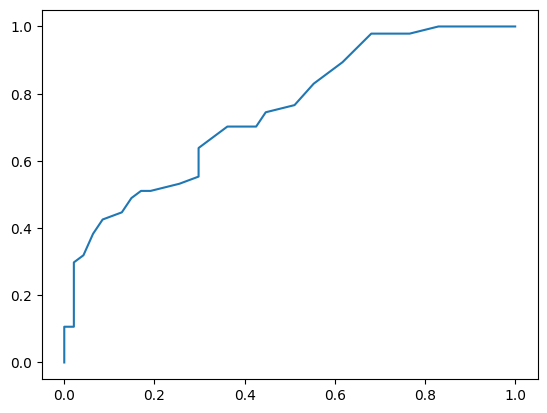

In [ ]:
# Предсказание вероятностей для валидационной выборки
y_pred_proba_rf_valid = rf_model.predict_proba(X_valid)[:, 1]

# Вычисление ROC-AUC
roc_auc_rf_valid = roc_auc_score(y_valid, y_pred_proba_rf_valid)
print(f"ROC-AUC для Random Forest на валидационной выборке: {roc_auc_rf_valid:.4f}")

# Построение ROC-кривой
fpr, tpr, _ = roc_curve(y_valid, y_pred_proba_rf_valid)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_rf_valid:.2f})')

ROC-AUC для Decision Tree на валидационной выборке: 0.4787


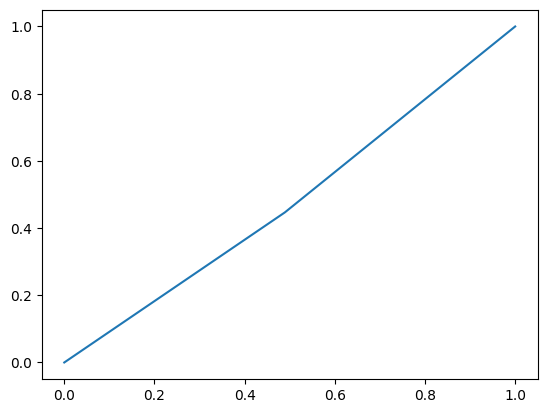

In [ ]:
# Предсказание вероятностей для валидационной выборки
y_pred_proba_dt_valid = dt_model.predict_proba(X_valid)[:, 1]

# Вычисление ROC-AUC
roc_auc_dt_valid = roc_auc_score(y_valid, y_pred_proba_dt_valid)
print(f"ROC-AUC для Decision Tree на валидационной выборке: {roc_auc_dt_valid:.4f}")

# Построение ROC-кривой
fpr, tpr, _ = roc_curve(y_valid, y_pred_proba_dt_valid)
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc_dt_valid:.2f})')

ROC-AUC для Gradient Boosting на валидационной выборке: 0.7809


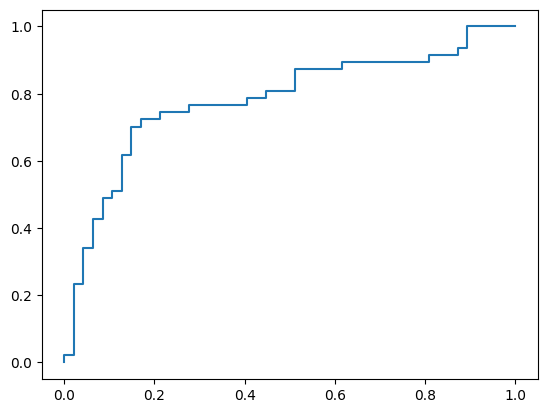

In [ ]:
# Предсказание вероятностей для валидационной выборки
y_pred_proba_gb_valid = gb_model.predict_proba(X_valid)[:, 1]

# Вычисление ROC-AUC
roc_auc_gb_valid = roc_auc_score(y_valid, y_pred_proba_gb_valid)
print(f"ROC-AUC для Gradient Boosting на валидационной выборке: {roc_auc_gb_valid:.4f}")

# Построение ROC-кривой
fpr, tpr, _ = roc_curve(y_valid, y_pred_proba_gb_valid)
plt.plot(fpr, tpr, label=f'Gradient Boosting (AUC = {roc_auc_gb_valid:.2f})')

ROC-AUC для Logistic Regression на валидационной выборке: 0.5618


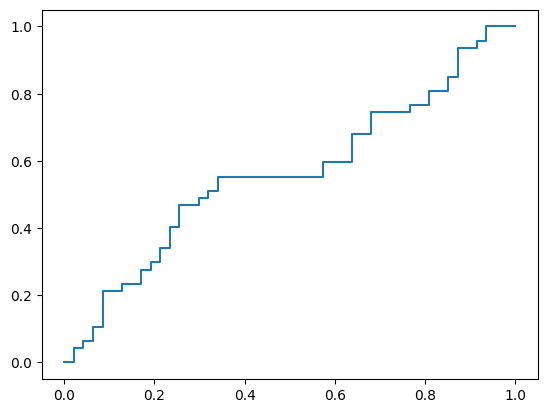

In [ ]:
# Предсказание вероятностей для валидационной выборки
y_pred_proba_logreg_valid = logreg_model.predict_proba(X_valid)[:, 1]

# Вычисление ROC-AUC
roc_auc_logreg_valid = roc_auc_score(y_valid, y_pred_proba_logreg_valid)
print(f"ROC-AUC для Logistic Regression на валидационной выборке: {roc_auc_logreg_valid:.4f}")

# Построение ROC-кривой
fpr, tpr, _ = roc_curve(y_valid, y_pred_proba_logreg_valid)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_logreg_valid:.2f})')

ROC-AUC для KNN на валидационной выборке: 0.5690


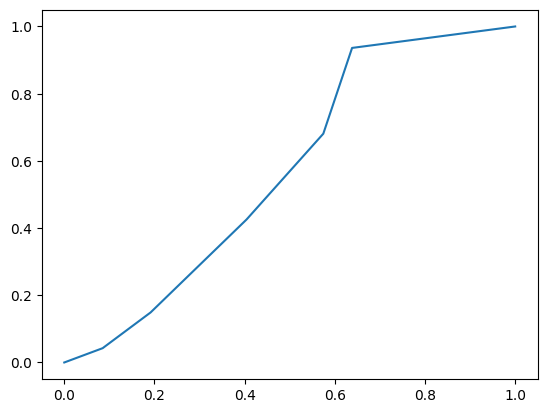

In [ ]:
# Предсказание вероятностей для валидационной выборки
y_pred_proba_knn_valid = knn_model.predict_proba(X_valid)[:, 1]

# Вычисление ROC-AUC
roc_auc_knn_valid = roc_auc_score(y_valid, y_pred_proba_knn_valid)
print(f"ROC-AUC для KNN на валидационной выборке: {roc_auc_knn_valid:.4f}")

# Построение ROC-кривой
fpr, tpr, _ = roc_curve(y_valid, y_pred_proba_knn_valid)
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc_knn_valid:.2f})')

In [ ]:
# Вывод метрик для Random Forest
y_pred_rf_valid = rf_model.predict(X_valid)

print("Accuracy для Random Forest на валидационной выборке:", accuracy_score(y_valid, y_pred_rf_valid))
print("Classification Report для Random Forest на валидационной выборке:\n", classification_report(y_valid, y_pred_rf_valid))
print("Confusion Matrix для Random Forest на валидационной выборке:\n", confusion_matrix(y_valid, y_pred_rf_valid))

Accuracy для Random Forest на валидационной выборке: 0.5
Classification Report для Random Forest на валидационной выборке:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4

Confusion Matrix для Random Forest на валидационной выборке:
 [[0 2]
 [0 2]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


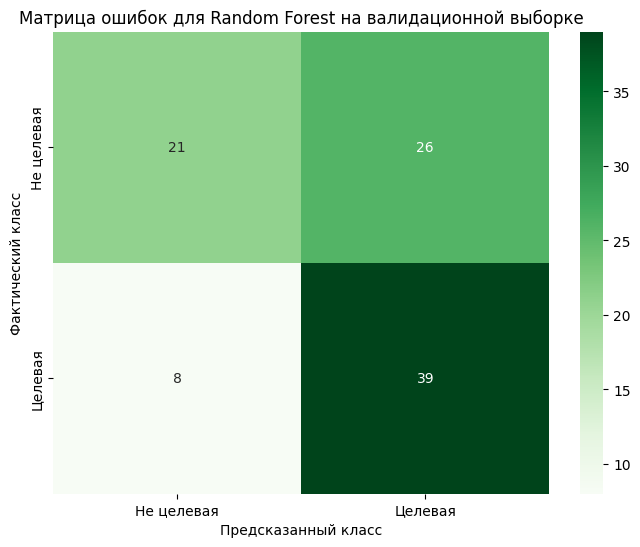

In [ ]:
# Визуализация матрицы ошибок для Random Forest
conf_matrix_rf_valid = confusion_matrix(y_valid, y_pred_rf_valid)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_valid, annot=True, fmt='d', cmap='Greens', xticklabels=['Не целевая', 'Целевая'], yticklabels=['Не целевая', 'Целевая'])
plt.ylabel('Фактический класс')
plt.xlabel('Предсказанный класс')
plt.title('Матрица ошибок для Random Forest на валидационной выборке')
plt.show()